In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import sklearn
import sys
import tensorflow as tf
import time
import random
import pathlib

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


training_path = pathlib.Path('./training3')
validation_path = pathlib.Path('./valid2')
test_path = pathlib.Path('./test_gray')

train_image_paths = list(training_path.glob('*/*'))  
valid_image_paths = list(validation_path.glob('*/*'))  
test_image_paths = list(test_path.glob('*/'))  

train_image_paths = [str(path) for path in train_image_paths]
valid_image_paths = [str(path) for path in valid_image_paths]
test_image_paths = [str(path) for path in test_image_paths]

random.shuffle(train_image_paths)
random.shuffle(valid_image_paths)
random.shuffle(test_image_paths)

train_image_count = len(train_image_paths)
valid_image_count = len(valid_image_paths)
test_image_count = len(test_image_paths)

print("Training Images -> ", train_image_count)
print("Validation Images -> ", valid_image_count)
print("Test Images -> ", test_image_count)

2.0.0
sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
numpy 1.16.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf
Training Images ->  20160
Validation Images ->  6048
Test Images ->  56


In [2]:
train_image_paths[:5]

['training3\\Nocturne\\295.jpg',
 'training3\\LeBlanc\\93.jpg',
 'training3\\Yorick\\138.jpg',
 'training3\\Taliyah\\15.jpg',
 'training3\\Taliyah\\349.jpg']

In [3]:
valid_image_paths[:5]

['valid2\\Sion\\44.jpg',
 'valid2\\Amumu\\57.jpg',
 'valid2\\Taric\\39.jpg',
 'valid2\\Lucian\\87.jpg',
 'valid2\\RekSai\\64.jpg']

In [4]:
test_image_paths[:5]

['test_gray\\Kindred.jpg',
 'test_gray\\Olaf.jpg',
 'test_gray\\Brand.jpg',
 'test_gray\\KhaZix.jpg',
 'test_gray\\Syndra.jpg']

In [5]:
label_names = sorted(item.name for item in training_path.glob('*/') if item.is_dir())
label_names

['Aatrox',
 'Amumu',
 'Annie',
 'Ashe',
 'Azir',
 'Brand',
 'Braum',
 'Diana',
 'DrMundo',
 'Ezreal',
 'Ivern',
 'Janna',
 'Jax',
 'Karma',
 'KhaZix',
 'Kindred',
 'KogMaw',
 'LeBlanc',
 'Leona',
 'Lucian',
 'Lux',
 'Malphite',
 'Malzahar',
 'Maokai',
 'MasterYi',
 'Nami',
 'Nasus',
 'Nautilus',
 'Neeko',
 'Nocturne',
 'Olaf',
 'Ornn',
 'Qiyana',
 'RekSai',
 'Renekton',
 'Senna',
 'Singed',
 'Sion',
 'Sivir',
 'Skarner',
 'Soraka',
 'Syndra',
 'Taliyah',
 'Taric',
 'Thresh',
 'Twitch',
 'Varus',
 'Vayne',
 'Veigar',
 'Vladimir',
 'Volibear',
 'Warwick',
 'Yasuo',
 'Yorick',
 'Zed',
 'Zyra']

In [6]:
training_image_labels = [pathlib.Path(path).parent.name for path in train_image_paths]
for image, label in zip(train_image_paths[:5], training_image_labels[:5]):
    print(image, ' --->  ', label)

training3\Nocturne\295.jpg  --->   Nocturne
training3\LeBlanc\93.jpg  --->   LeBlanc
training3\Yorick\138.jpg  --->   Yorick
training3\Taliyah\15.jpg  --->   Taliyah
training3\Taliyah\349.jpg  --->   Taliyah


In [7]:
train_labels_info = []
for image_path, label in zip(train_image_paths, training_image_labels):
    train_labels_info.append((image_path, label))

In [8]:
import pprint
pprint.pprint(train_labels_info[:5])

[('training3\\Nocturne\\295.jpg', 'Nocturne'),
 ('training3\\LeBlanc\\93.jpg', 'LeBlanc'),
 ('training3\\Yorick\\138.jpg', 'Yorick'),
 ('training3\\Taliyah\\15.jpg', 'Taliyah'),
 ('training3\\Taliyah\\349.jpg', 'Taliyah')]


In [9]:
valid_image_labels = [pathlib.Path(path).parent.name for path in valid_image_paths]
for image, label in zip(valid_image_paths[:5], valid_image_labels[:5]):
    print(image, ' --->  ', label)

valid2\Sion\44.jpg  --->   Sion
valid2\Amumu\57.jpg  --->   Amumu
valid2\Taric\39.jpg  --->   Taric
valid2\Lucian\87.jpg  --->   Lucian
valid2\RekSai\64.jpg  --->   RekSai


In [10]:
valid_labels_info = []
for image_path, label in zip(valid_image_paths, valid_image_labels):
    valid_labels_info.append((image_path, label))

In [11]:
pprint.pprint(valid_labels_info[:5])

[('valid2\\Sion\\44.jpg', 'Sion'),
 ('valid2\\Amumu\\57.jpg', 'Amumu'),
 ('valid2\\Taric\\39.jpg', 'Taric'),
 ('valid2\\Lucian\\87.jpg', 'Lucian'),
 ('valid2\\RekSai\\64.jpg', 'RekSai')]


In [12]:
test_image_labels = [path.split('\\')[1].split('.')[0] for path in test_image_paths]
for image, label in zip(test_image_paths[:5], test_image_labels[:5]):
    print(image, ' --->  ', label)

test_gray\Kindred.jpg  --->   Kindred
test_gray\Olaf.jpg  --->   Olaf
test_gray\Brand.jpg  --->   Brand
test_gray\KhaZix.jpg  --->   KhaZix
test_gray\Syndra.jpg  --->   Syndra


In [13]:
test_labels_info = []
for image_path, label in zip(test_image_paths, test_image_labels):
    test_labels_info.append((image_path, label))

In [14]:
train_df = pd.DataFrame(train_labels_info)
valid_df = pd.DataFrame(valid_labels_info)
test_df = pd.DataFrame(test_labels_info)

train_df.columns = valid_df.columns =test_df.columns = ['filepath', 'class']

print(train_df.head())
print(valid_df.head())
print(test_df.head())

                     filepath     class
0  training3\Nocturne\295.jpg  Nocturne
1    training3\LeBlanc\93.jpg   LeBlanc
2    training3\Yorick\138.jpg    Yorick
3    training3\Taliyah\15.jpg   Taliyah
4   training3\Taliyah\349.jpg   Taliyah
               filepath   class
0    valid2\Sion\44.jpg    Sion
1   valid2\Amumu\57.jpg   Amumu
2   valid2\Taric\39.jpg   Taric
3  valid2\Lucian\87.jpg  Lucian
4  valid2\RekSai\64.jpg  RekSai
                filepath    class
0  test_gray\Kindred.jpg  Kindred
1     test_gray\Olaf.jpg     Olaf
2    test_gray\Brand.jpg    Brand
3   test_gray\KhaZix.jpg   KhaZix
4   test_gray\Syndra.jpg   Syndra


In [26]:
height = 64
width = 64
channels = 1
batch_size = 128
num_classes = 56

train_datagen = keras.preprocessing.image.ImageDataGenerator(
    #像素值 都除以255
    rescale = 1./255,
    # 图片随机旋转 (5度以内)
    rotation_range = 5,
    # 图片左右位移  20%限度以内
    width_shift_range = 0.2,
    # 图片上下位移  20%限度以内
    height_shift_range = 0.2,
    # 图像剪切强度
    shear_range = 0.2,
    # 图像缩放强度
    zoom_range = 0.2,
    # 是否水平翻转
    horizontal_flip = False,
    # 放大缩小吼， 像素填充方式
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_dataframe(train_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 2333,
                                                    shuffle = True,
                                                    color_mode="grayscale",
                                                    class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
valid_generator = valid_datagen.flow_from_dataframe(valid_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 2333,
                                                    shuffle = True,
                                                    color_mode="grayscale",
                                                    class_mode = "categorical")

test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
)
test_generator = test_datagen.flow_from_dataframe(test_df, directory = './',
                                                    x_col = 'filepath',
                                                    y_col = 'class',
                                                    classes = label_names,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 2333,
                                                    shuffle = True,
                                                    color_mode="grayscale",
                                                    class_mode = "categorical")

Found 20160 validated image filenames belonging to 56 classes.
Found 6048 validated image filenames belonging to 56 classes.
Found 56 validated image filenames belonging to 56 classes.


In [27]:
train_num = train_generator.samples
valid_num = valid_generator.samples
test_num = test_generator.samples

print("Training Generator Sample -> ", train_num)
print("Validation Generator Sample -> ", valid_num)
print("Test Generator Sample -> ", test_num)

Training Generator Sample ->  20160
Validation Generator Sample ->  6048
Test Generator Sample ->  56


In [28]:
for i in range(2):
    x, y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(128, 64, 64, 1) (128, 56)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]]
(128, 64, 64, 1) (128, 56)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=16, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=32, kernel_size = 3, padding='same',
                       activation = 'selu', input_shape = [width, height, channels]),
    keras.layers.Conv2D(filters=32, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.Conv2D(filters=64, kernel_size = 3, 
                        padding='same', activation = 'selu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'selu'),
    
    keras.layers.Dense(num_classes, activation = 'softmax')
])

model.compile(loss="categorical_crossentropy",
             optimizer = "adam", metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)       

In [30]:
epochs = 20
#因为数据是generator 产生的 所以不能用fit函数
history = model.fit_generator(train_generator, steps_per_epoch=train_num // batch_size,
                             epochs=epochs, validation_data=valid_generator,
                             validation_steps=valid_num//batch_size)

Epoch 1/20
157/157 [==============================] - 22s 137ms/step - loss: 2.3538 - accuracy: 0.3998 - val_loss: 1.6962 - val_accuracy: 0.5455
Epoch 2/20
157/157 [==============================] - 20s 126ms/step - loss: 1.0445 - accuracy: 0.7178 - val_loss: 0.8661 - val_accuracy: 0.7477
Epoch 3/20
157/157 [==============================] - 20s 126ms/step - loss: 0.5638 - accuracy: 0.8440 - val_loss: 0.5444 - val_accuracy: 0.8268
Epoch 4/20
157/157 [==============================] - 20s 129ms/step - loss: 0.3803 - accuracy: 0.8946 - val_loss: 1.3034 - val_accuracy: 0.6948
Epoch 5/20
157/157 [==============================] - 20s 125ms/step - loss: 0.3086 - accuracy: 0.9158 - val_loss: 2.0010 - val_accuracy: 0.5946
Epoch 6/20
157/157 [==============================] - 20s 125ms/step - loss: 0.2412 - accuracy: 0.9311 - val_loss: 0.6930 - val_accuracy: 0.8281
Epoch 7/20
157/157 [==============================] - 20s 126ms/step - loss: 0.2407 - accuracy: 0.9327 - val_loss: 2.3099 - val_ac

In [31]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_' + label]
    
    pd.DataFrame(data).plot(figsize = (8,5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()

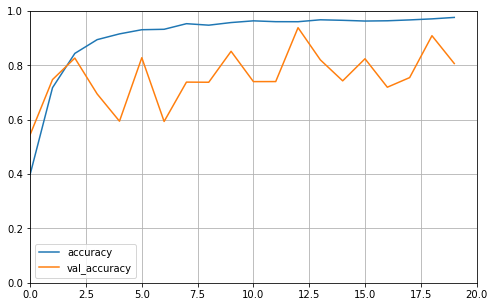

In [32]:
plot_learning_curves(history, 'accuracy', epochs, 0, 1)

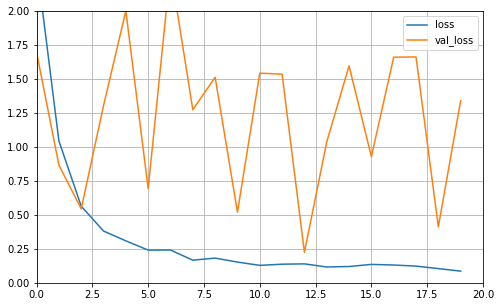

In [33]:
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [34]:
def load_and_preprocess_single_img(path):
    # read the img through file path
    image = tf.io.read_file(path)  
    image = tf.image.decode_jpeg(image, channels=1)
    # 原始图片大小为(128, 128, 3)，重设为(64, 64)
    image = tf.image.resize(image, [64, 64])  
    image = tf.cast(image, tf.float32) / 255.0  # 归一化到[0,1]范围
    image = np.expand_dims(image, axis = 0) # since you have batch_size, so you need to expand your image
    return image

In [35]:
def evaluate_single_pic(path, show=False):
    
    if show:
        import matplotlib.image as mpimg
        plt.imshow(mpimg.imread(path))
    image = load_and_preprocess_single_img(path)
    predict_result = model.predict(image)
    print("This is", label_names[np.argmax(predict_result, axis=1)[0]])

This is Olaf


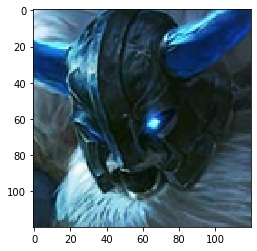

In [36]:
test_pic_path = "./test.jpg"
evaluate_single_pic(test_pic_path, True)

This is Aatrox


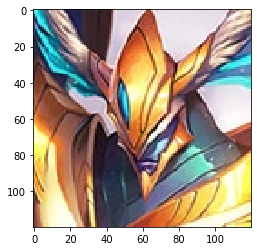

In [37]:
test_pic_path2 = "./card.jpg"
evaluate_single_pic(test_pic_path2, True)

In [38]:
sss = model.evaluate(test_generator)
sss

1/1 [==============================] - 0s 362ms/step - loss: 5.7908 - accuracy: 0.6071


[5.790806293487549, 0.60714287]

In [39]:
print("predicted --> real")
for _, row in test_df.iterrows():
#     print(row['filepath'], row['class'])
    image = load_and_preprocess_single_img('.\\' + row['filepath'])
    predict_result = model.predict(image)
    predicted_class = label_names[np.argmax(predict_result, axis=1)[0]]
    if (predicted_class != (row['class'])):
        print(predicted_class + " --> " + row['class'])

predicted --> real
Nautilus --> Brand
Vayne --> Syndra
Amumu --> Zyra
Ashe --> Volibear
Ashe --> Yorick
DrMundo --> Senna
Veigar --> Vayne
Nautilus --> Lucian
Leona --> Malzahar
Nautilus --> Jax
Lucian --> Sivir
Jax --> Azir
DrMundo --> Braum
Veigar --> Twitch


This is Sion


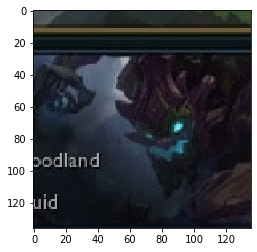

In [44]:
test_pic_path3 = "./aaa.jpg"
evaluate_single_pic(test_pic_path3, True)

This is Senna


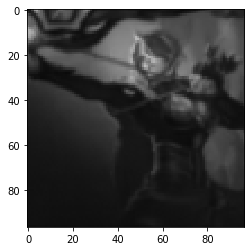

In [41]:
evaluate_single_pic("./2.png", True)